# Practical Application Assignment 17.1: Comparing Classifiers

**Overview**: In this third practical application assignment, your goal is to compare the performance of the classifiers (k-nearest neighbors, logistic regression, decision trees, and support vector machines) you encountered in this section of the program. You will use a dataset related to the marketing of bank products over the telephone.


### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.

### Understanding Data

The dataset collected is related to **17 campaigns** that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts.

A phone campaign was conducted to offer an attractive long-term deposit application with good interest rates. During the interaction, details of each contact, including job, marital status, education, housing, and personal loan information, were recorded. The Long-term deposit application had an 8% success rate, with 6,499 out of 79,354 contacts accepting.

### Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer, make_column_transformer

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder

In [2]:
#Add panda options for column displays
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = 160

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# Change Y feature name to a more meaningful name
df.rename(columns = {'y':'deposit'}, inplace = True)

In [6]:
#Clean data with no nulls
df.isna().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
deposit           False
dtype: bool

### To gain a better understanding of the effects certain features had on the output variable, we will conduct an exploratory data analysis.

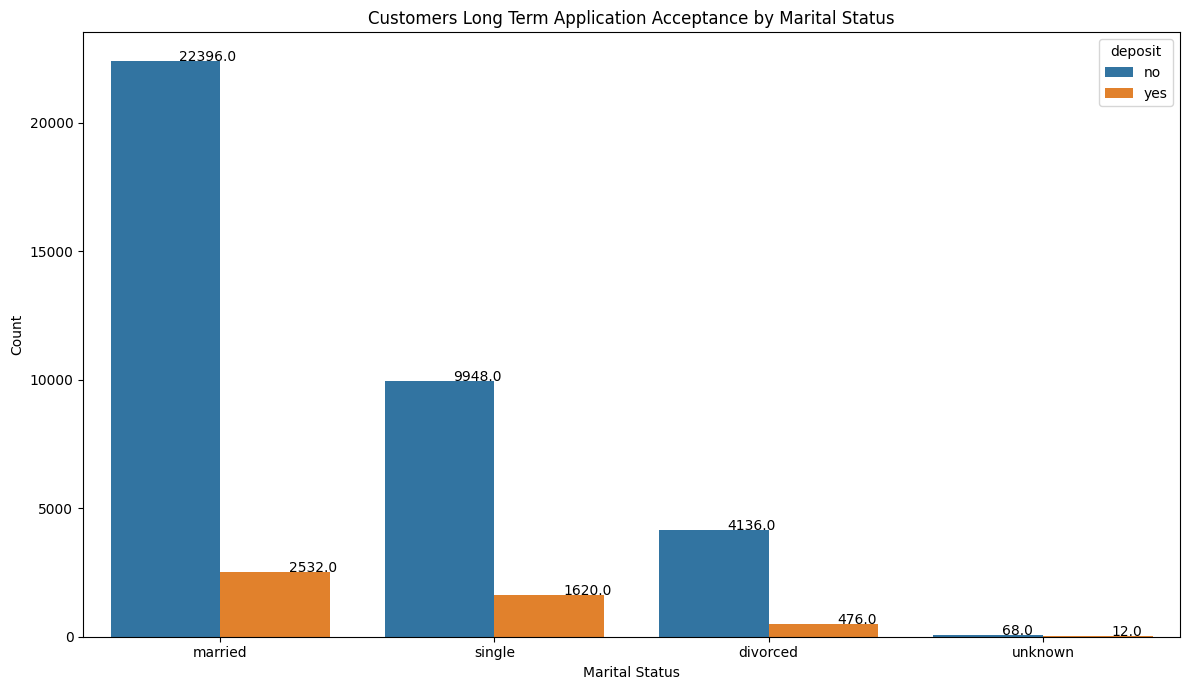

In [7]:
plt.rcParams["figure.figsize"] = [12, 7]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(x ='marital', hue = "deposit", data = df)
ax.set_title('Customers Long Term Application Acceptance by Marital Status')

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

ax.set_xlabel('Marital Status')
ax.set_ylabel('Count')
plt.show()

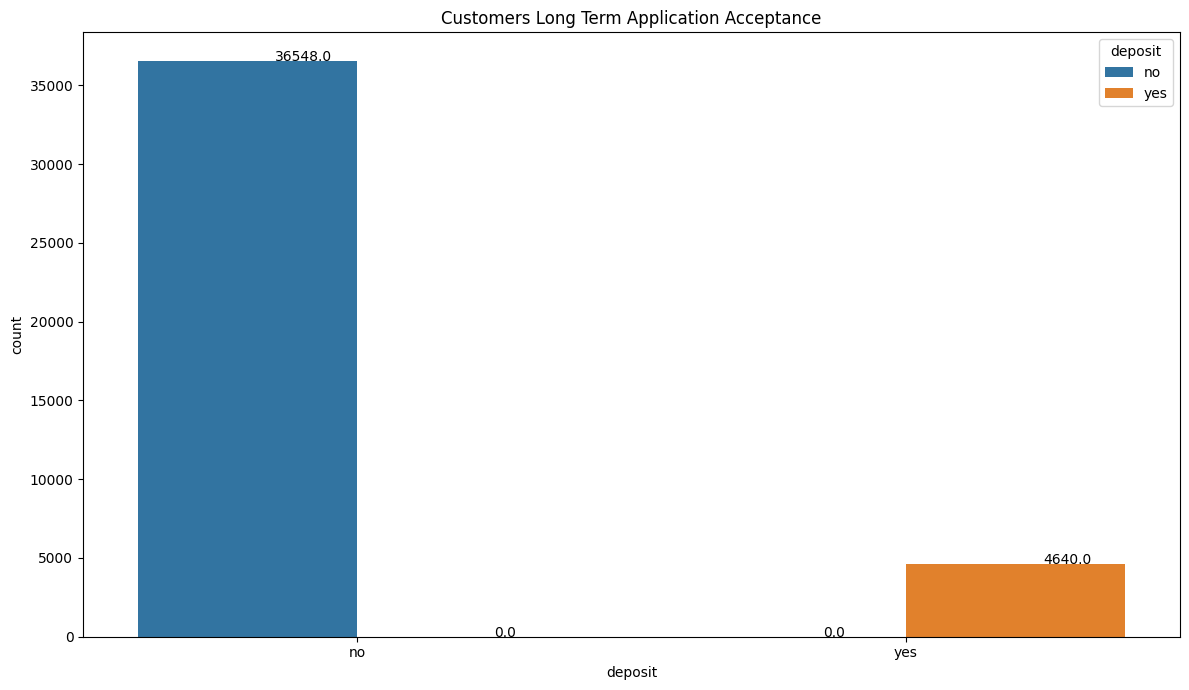

In [8]:
plt.rcParams["figure.figsize"] = [12, 7]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(x ='deposit', hue = "deposit", data = df)
ax.set_title('Customers Long Term Application Acceptance')

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

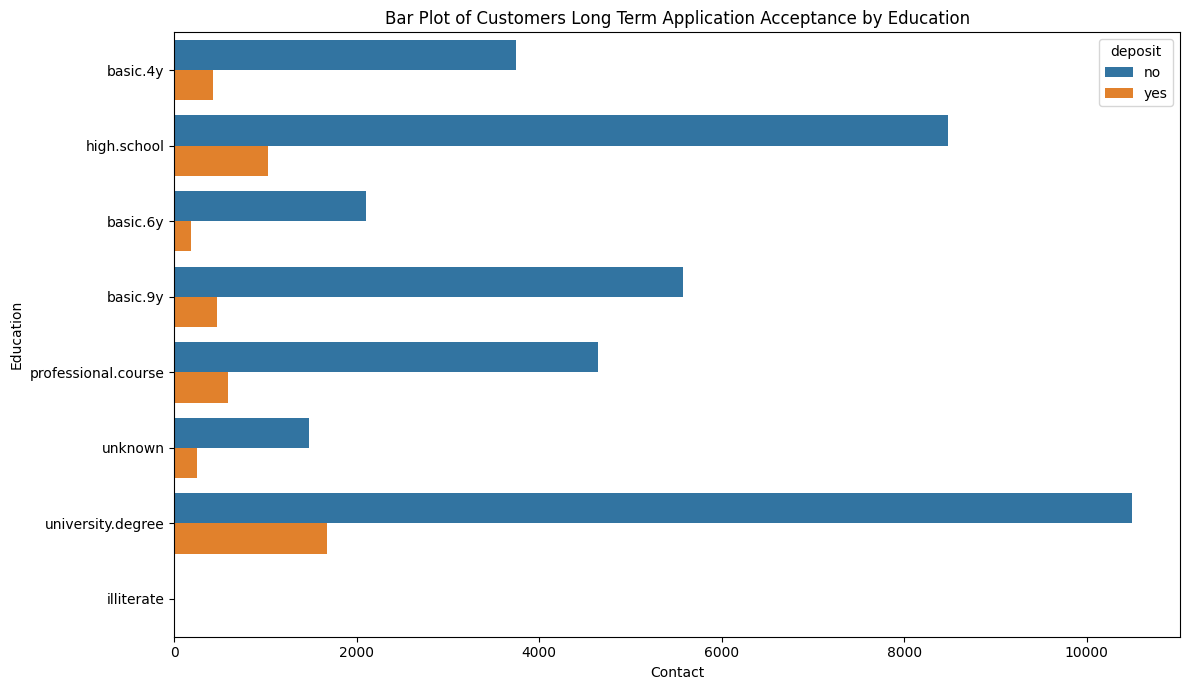

In [9]:
ax = sns.countplot(y ='education', hue = "deposit", data = df)
ax.set_title('Bar Plot of Customers Long Term Application Acceptance by Education')
ax.set_xlabel('Contact')
ax.set_ylabel('Education')
plt.show()

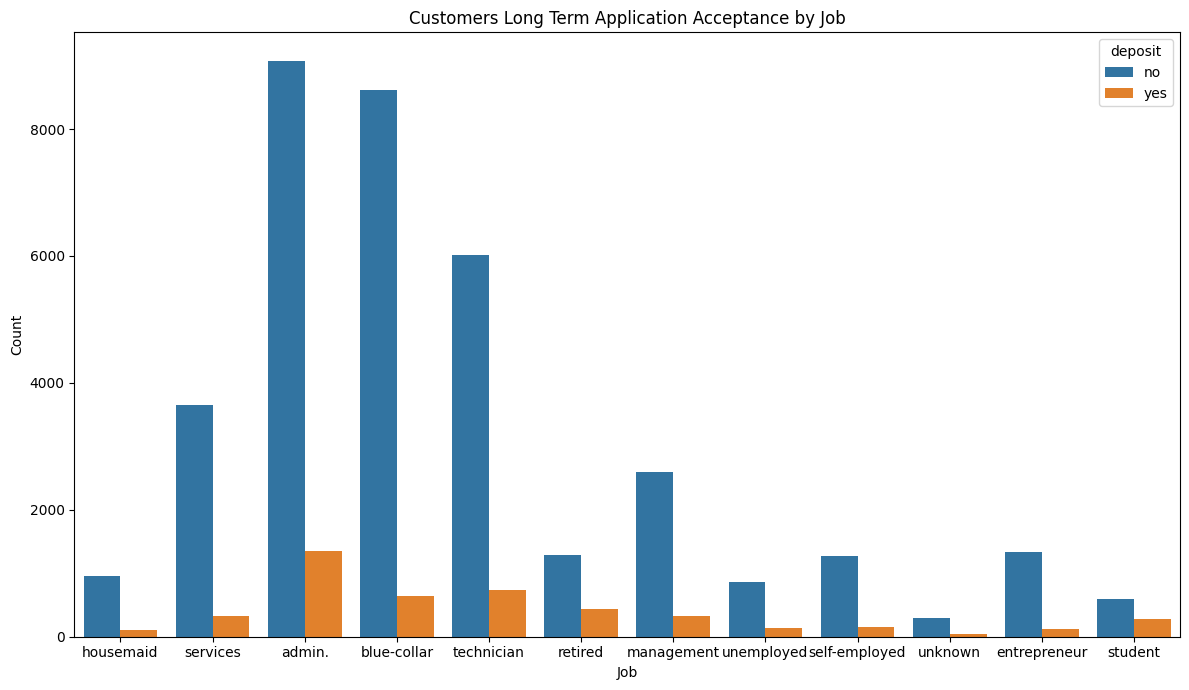

In [10]:
ax = sns.countplot(x ='job', hue = "deposit", data = df)
ax.set_title('Customers Long Term Application Acceptance by Job')
ax.set_xlabel('Job')
ax.set_ylabel('Count')
plt.show()

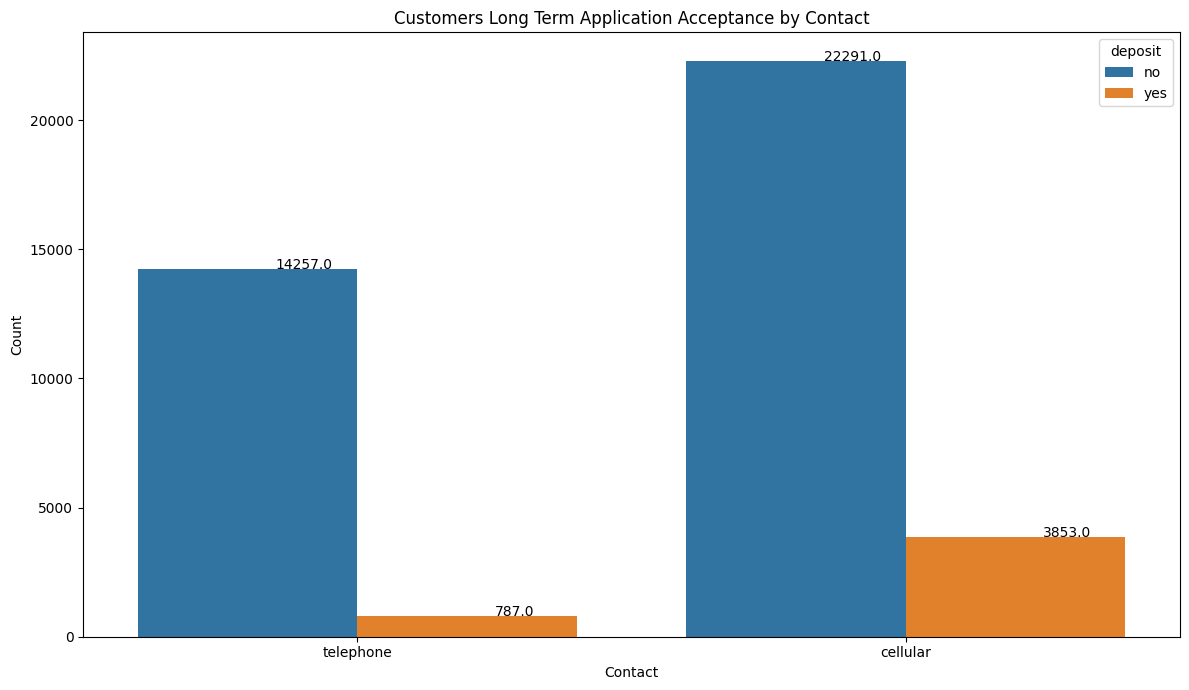

In [11]:
plt.rcParams["figure.figsize"] = [12, 7]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(x ='contact', hue = "deposit", data = df)
ax.set_title('Customers Long Term Application Acceptance by Contact')

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

ax.set_xlabel('Contact')
ax.set_ylabel('Count')
plt.show()

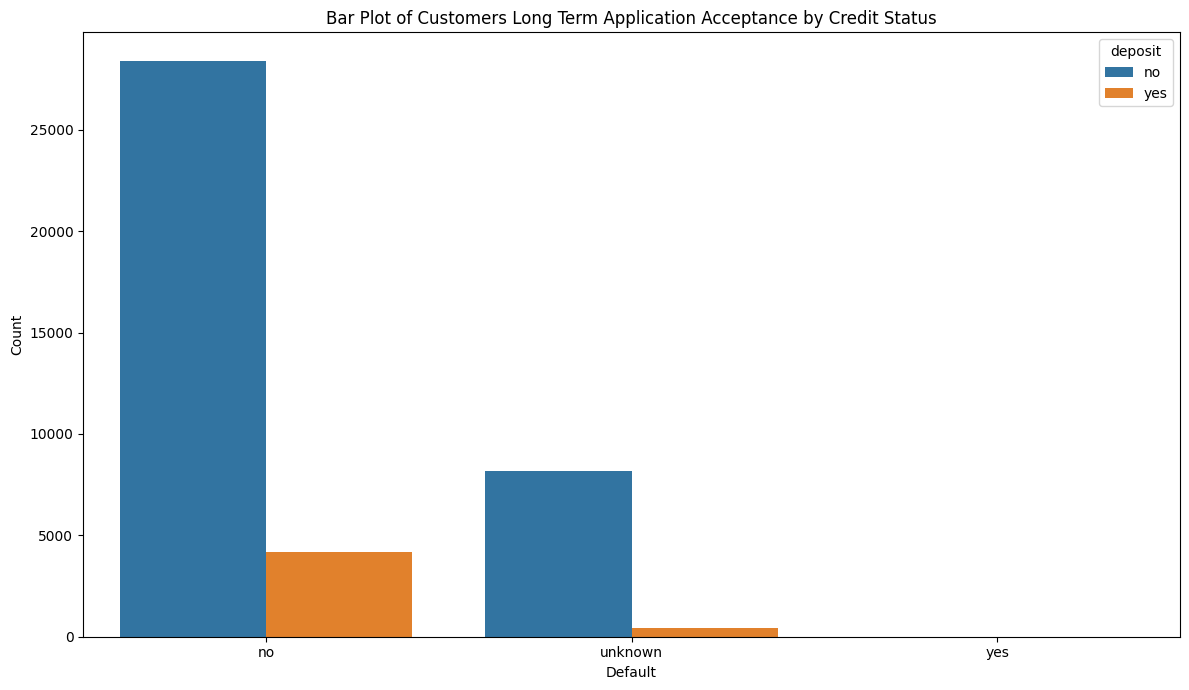

In [12]:
ax = sns.countplot(x ='default', hue = "deposit", data = df)
ax.set_title('Bar Plot of Customers Long Term Application Acceptance by Credit Status')
ax.set_xlabel('Default')
ax.set_ylabel('Count')
plt.show()

In [13]:
df['default'].value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

### Let's explore the relationship between customer demographics and their enrollment in the Long Term product.

In [14]:
# Create a new df with customers where deposit = yes
value='yes'
bank_df=df.query("deposit == @value")
bank_df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,1575,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,1042,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,1467,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,579,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,461,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
182,42,blue-collar,married,basic.9y,no,yes,yes,telephone,may,mon,673,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
286,39,housemaid,married,basic.9y,no,yes,no,telephone,may,mon,935,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
388,28,unknown,single,unknown,unknown,yes,yes,telephone,may,tue,1201,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
389,44,services,married,high.school,no,yes,no,telephone,may,tue,1030,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
446,42,technician,married,professional.course,no,no,no,telephone,may,tue,1623,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes


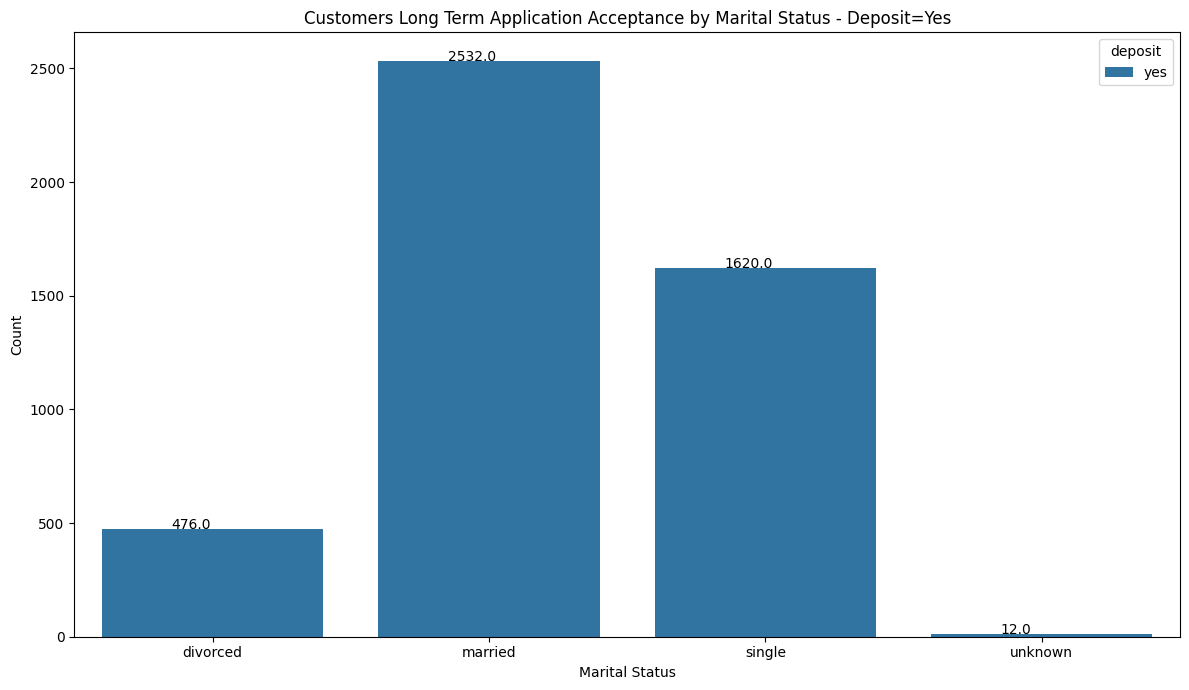

In [15]:
plt.rcParams["figure.figsize"] = [12, 7]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(x =bank_df['marital'], hue = bank_df["deposit"], data = df)
ax.set_title('Customers Long Term Application Acceptance by Marital Status - Deposit=Yes')

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

ax.set_xlabel('Marital Status')
ax.set_ylabel('Count')
plt.show()

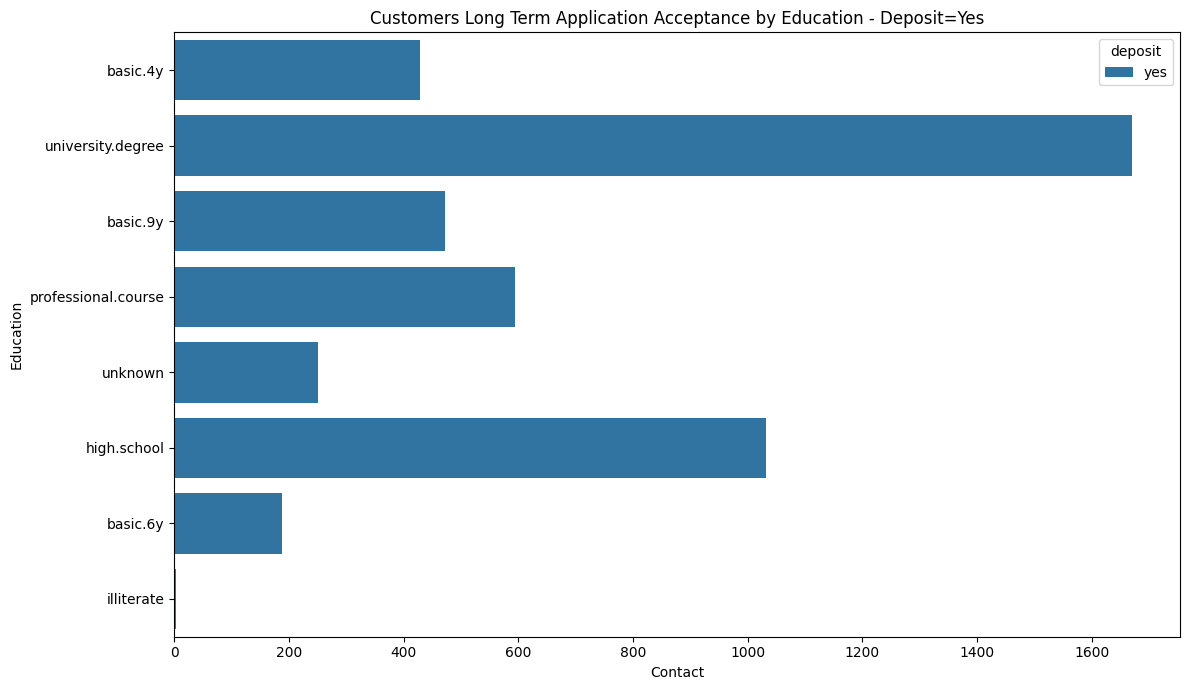

In [16]:
ax = sns.countplot(y ='education', hue = "deposit", data = bank_df)
ax.set_title('Customers Long Term Application Acceptance by Education - Deposit=Yes')
ax.set_xlabel('Contact')
ax.set_ylabel('Education')
plt.show()

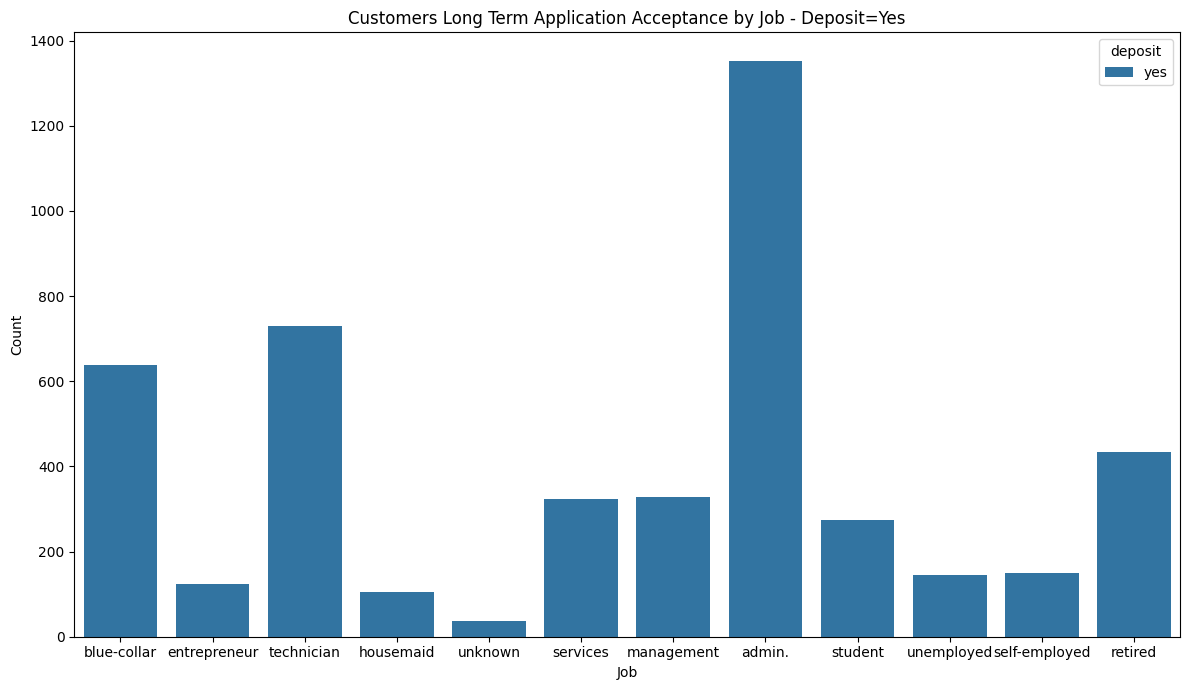

In [17]:
ax = sns.countplot(x ='job', hue = "deposit", data = bank_df)
ax.set_title('Customers Long Term Application Acceptance by Job - Deposit=Yes')
ax.set_xlabel('Job')
ax.set_ylabel('Count')
plt.show()

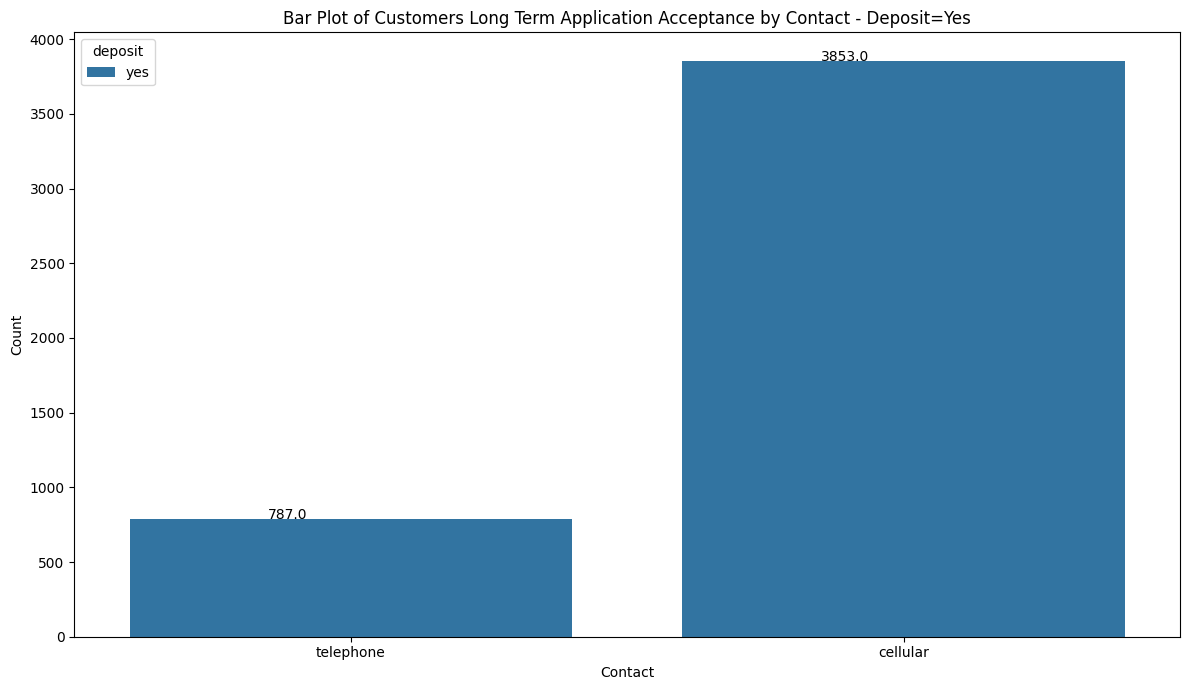

In [18]:
plt.rcParams["figure.figsize"] = [12, 7]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(x ='contact', hue = "deposit", data = bank_df)

# Adding Title to the Plot
ax.set_title('Bar Plot of Customers Long Term Application Acceptance by Contact - Deposit=Yes')

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

# Setting the X and Y labels
ax.set_xlabel('Contact')
ax.set_ylabel('Count')
 
# Show the plot
plt.show()

#### Analysis of Successful Customer Sign-Ups for Bank Product/Marketing Campaign

The bank was most successful in signing up customers for the bank loan product/marketing campaign with the following characteristics:

- Marital Status: Married individuals, followed by single individuals.
- Education: University degree holders.
- Job: Administrative roles (broad category), followed by technicians, then blue-collar workers.
- Marketing Campaign: Cellular phone users were more receptive to the marketing campaign.

### Problem Statement

This dataset, provided by a Portuguese banking institution, contains the results of multiple marketing campaigns. Analysis reveals that the campaigns were not very successful in encouraging customers to sign up for the long-term deposit product.

The business objective of this machine learning project is to identify factors that could improve the success rate. For example:
- Does having loan products, such as housing loans, positively impact the customer success rate?
- Do customers with a university degree have a higher success rate?
- How does the contact method (e.g., cellular) affect the success rate for long-term loan products?

### Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [19]:
feature_cols = [
    'job', 'marital', 'education', 'default', 'housing',
    'loan', 'contact'
]

X = df[feature_cols]
y = df['deposit']

X.head(10)

,job,marital,education,default,housing,loan,contact
0,housemaid,married,basic.4y,no,no,no,telephone
1,services,married,high.school,unknown,no,no,telephone
2,services,married,high.school,no,yes,no,telephone
3,admin.,married,basic.6y,no,no,no,telephone
4,services,married,high.school,no,no,yes,telephone
5,services,married,basic.9y,unknown,no,no,telephone
6,admin.,married,professional.course,no,no,no,telephone
7,blue-collar,married,unknown,unknown,no,no,telephone
8,technician,single,professional.course,no,yes,no,telephone
9,services,single,high.school,no,yes,no,telephone


In [20]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown='ignore'),
                                        ['job', 'marital', 'education','default','contact']),
                                      (OrdinalEncoder(), ['housing','loan']),
                                      remainder='passthrough')

column_trans.fit(X)

le = LabelEncoder()
le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.pipeline import Pipeline

dtc_pipe = Pipeline ([
    ('transformer', column_trans),
    ('scale', StandardScaler(with_mean=False)),
    ('model', DecisionTreeClassifier(max_depth=5))
])

In [21]:
%%time
dtc = dtc_pipe.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)

CPU times: user 228 ms, sys: 13 ms, total: 241 ms
Wall time: 241 ms


In [22]:
# Evaluate the performance of the model, we will calculate the accuracy, precision, recall, and f1-score:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test, dtc_pred)
precision = precision_score(y_test, dtc_pred, average='macro')
recall = recall_score(y_test, dtc_pred, average='macro')
f1 = f1_score(y_test, dtc_pred, average='macro')

print("Accuracy: {:.6f}".format(accuracy))
print("Precision: {:.6f}".format(precision))
print("Recall: {:.6f}".format(recall))
print("F1-score: {:.6f}".format(f1))

Accuracy: 0.887432
Precision: 0.443788
Recall: 0.499909
F1-score: 0.470180


### Visualize the results - Confusion matrix

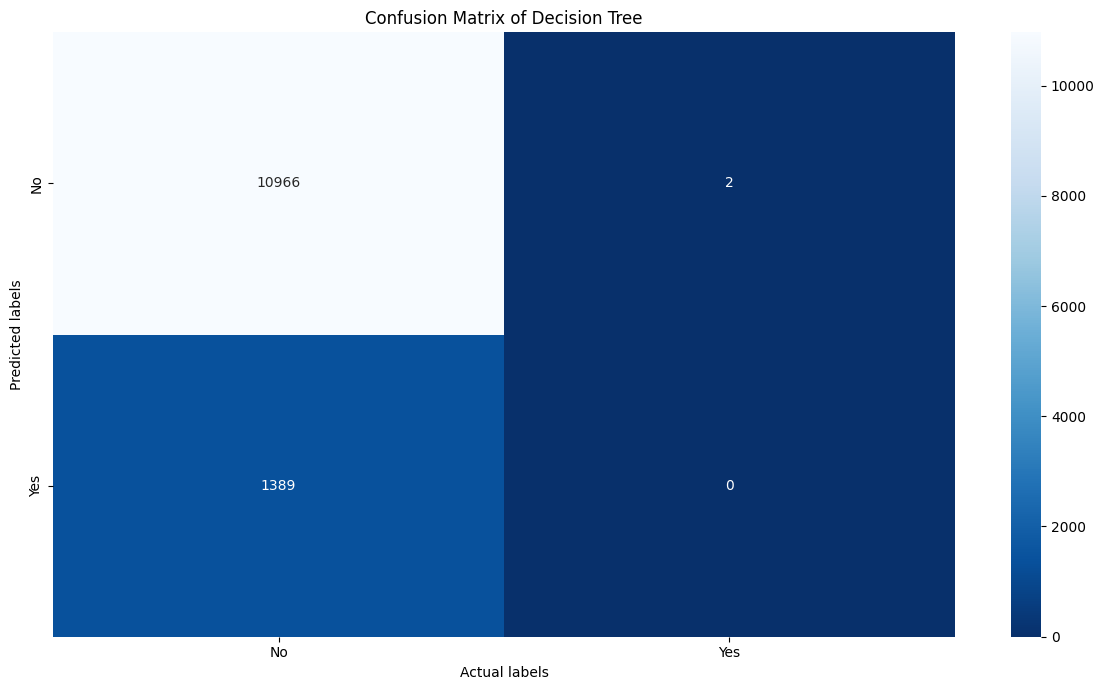

In [23]:
import seaborn as sns
ax= plt.subplot()
conf_matrix = confusion_matrix(y_test, dtc_pred)
sns.heatmap(conf_matrix, annot = True, cmap = 'Blues_r', fmt = 'd', ax=ax)

# labels, title and ticks
ax.set_xlabel('Actual labels');ax.set_ylabel('Predicted labels'); 
ax.set_title('Confusion Matrix of Decision Tree'); 
ax.xaxis.set_ticklabels(['No', 'Yes']); 
ax.yaxis.set_ticklabels(['No', 'Yes']);
plt.show()

In the context of a DecisionTreeClassifier and its corresponding confusion matrix, a high number of TP rates and no TN rates were observed. Combined with an accuracy rate of 0.89, the model can be considered good despite recall and precision values at or below 0.5.

- Recall scores less than 0.5 indicate a high number of false negatives, potentially resulting from class imbalance or untuned model hyperparameters.
- Precision scores less than 0.5 indicate a high number of false positives, which can also be attributed to class imbalance or untuned model hyperparameters.

The confusion matrix results may seem slightly counterintuitive due to the dataset being heavily skewed towards customers who declined the long-term product, resulting in 'No' being the true positive with a value of 10,967.

### Basic Model using Logistic Regression

In [24]:
logr_pipe = Pipeline ([
    ('transformer', column_trans),
    ('scale', StandardScaler(with_mean=False)),
    ('model', LogisticRegression())
])

In [25]:
%%time
# Train the classifiers
logr = logr_pipe.fit(X_train, y_train)

# use the model to predict the class labels of the test set:
logr_pred = logr.predict(X_test)

CPU times: user 338 ms, sys: 3.29 ms, total: 341 ms
Wall time: 339 ms


### Finding accuracy of the model

In [26]:
# Evaluate the performance of the model, we will calculate the accuracy, precision, recall, and f1-score:
accuracy = accuracy_score(y_test, logr_pred)
precision = precision_score(y_test, logr_pred, average='macro')
recall = recall_score(y_test, logr_pred, average='macro')
f1 = f1_score(y_test, logr_pred, average='macro')

print("Accuracy: {:.6f}".format(accuracy))
print("Precision: {:.6f}".format(precision))
print("Recall: {:.6f}".format(recall))
print("F1-score: {:.6f}".format(f1))

Accuracy: 0.887594
Precision: 0.443797
Recall: 0.500000
F1-score: 0.470225


Quick review of this results show that accuracy scores were very close with numbers over 85%, however the recall, precision and F1_Score were below 50%.

This means the classifier has a high number of False negatives which can be an outcome of imbalanced class or untuned model hyperparameters. More likely because of the imbalanced dataset with a higher number of Deposit = No records.

## Model Comparisons

Next, we will fit and score a Logistic Regression model, a KNN algorithm, a Decision Tree, and an SVM model using their default settings. The goal is to compare the performance of these models, including their fit times.
 

### Building a Logistic Regression model

In [27]:
%%time
lgr1_pipe = Pipeline ([
    ('transformer', column_trans),
    ('scale', StandardScaler(with_mean=False)),
    ('model', LogisticRegression())
])

lgr1 = lgr1_pipe.fit(X_train, y_train)
lgr1_pred = lgr1.predict(X_test)

lgr1_train_score = lgr1.score(X_train, y_train)
print("Training Accuracy Score", lgr1_train_score)

lgr1_test_score = lgr1.score(X_test, y_test)
print("Test Accuracy Score", lgr1_test_score)

Training Accuracy Score 0.8872047448926502
Test Accuracy Score 0.8875940762320952
CPU times: user 540 ms, sys: 20.3 ms, total: 560 ms
Wall time: 557 ms


### Building a KNN  model

In [28]:
%%time

knn_pipe = Pipeline ([
    ('transformer', column_trans),
    ('scale', StandardScaler(with_mean=False)),
    ('model', KNeighborsClassifier())
])

knn = knn_pipe.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

knn_train_score = knn.score(X_train, y_train)
print("Training Accuracy Score", knn_train_score)

knn_test_score = knn.score(X_test, y_test)
print("Test Accuracy Score", knn_test_score)

Training Accuracy Score 0.8858173493808748
Test Accuracy Score 0.8829813061422676
CPU times: user 3min 11s, sys: 648 ms, total: 3min 12s
Wall time: 37.3 s


### Building a Decision Tree  model

In [29]:
%%time

dtc1_pipe = Pipeline ([
    ('transformer', column_trans),
    ('scale', StandardScaler(with_mean=False)),
    ('model', DecisionTreeClassifier())
])

dtc1 = dtc1_pipe.fit(X_train, y_train)
dtc1_pred = dtc1.predict(X_test)

dtc1_train_score = dtc1.score(X_train, y_train)
print("Training Accuracy Score", dtc1_train_score)

dtc1_test_score = dtc1.score(X_test, y_test)
print("Test Accuracy Score", dtc1_test_score)

Training Accuracy Score 0.8911935069890049
Test Accuracy Score 0.8846807477543093
CPU times: user 702 ms, sys: 15 ms, total: 717 ms
Wall time: 729 ms


### Building a SVM model

In [30]:
%%time

svm_pipe = Pipeline ([
    ('transformer', column_trans),
    ('scale', StandardScaler(with_mean=False)),
    ('model', SVC())
])

svm = svm_pipe.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

svm_train_score = svm.score(X_train, y_train)
print("Training Accuracy Score", svm_train_score)

svm_test_score = svm.score(X_test, y_test)
print("Test Accuracy Score", svm_test_score)

Training Accuracy Score 0.8873087995560335
Test Accuracy Score 0.8875131504410455
CPU times: user 47 s, sys: 521 ms, total: 47.5 s
Wall time: 49.8 s


### Results from Models

In [33]:
pd.DataFrame({'Model': ['Logistic', 'KNN','Decision Tree', 'SVM'], 
             'Train Time (s)': ['0.557', '37.3', '0.702','49.8'],
             'Train Accuracy': ['0.8872047448926502', '0.8858173493808748', '0.8911935069890049','0.8873087995560335'],
             'Test Accuracy': ['0.8875940762320952', '0.8829813061422676', '0.8846807477543093','0.8875131504410455']})

,Model,Train Time (s),Train Accuracy,Test Accuracy
0,Logistic,0.557,0.8872047448926502,0.8875940762320952
1,KNN,37.3,0.8858173493808748,0.8829813061422676
2,Decision Tree,0.702,0.8911935069890049,0.8846807477543093
3,SVM,49.8,0.8873087995560335,0.8875131504410455


The results from the model comparison indicate that Logistic Regression outperformed the other models evaluated. It not only achieved the lowest training time in seconds but also secured the highest accuracy scores for both the training and testing datasets. These findings suggest that Logistic Regression is the most efficient and accurate model among those compared, making it a strong candidate for implementation in the given context.